In [30]:
from config import OPENAI_API_KEY
from chat_agents import generate_response
from chat_agents import simulate_group_chat
from chat_agents import reply_to_survey

from great_tables import GT
import pandas as pd
import seaborn as sns
from openai import OpenAI
import json

# OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

In [2]:

client = OpenAI(api_key=OPENAI_API_KEY)


In [3]:
r1 = generate_response("What do you think?", system_content = "return hello world", client = client)

In [4]:
r1

"Hello! I'm an AI, so I don't have personal thoughts or opinions. However, I'm here to help you with any questions or topics you want to discuss. How can I assist you today?"

In [5]:
my_chat_history = []
# Simulate a group chat with 3 agents

myagents = {
        "Life Scientist": "As a Life Scientist, your mission is to help select the best landing site for a 6-member international crew (3 US, 3 Russian) traveling 140 million miles from the Moon to Mars to establish the first human scientific outpost. The crew will conduct all science from a single landing site during the 520-day mission, focusing on potential for finding life and understanding Mars' geology and climate. The four candidate sites are: Argyre, with high perchlorates and frequent landslides suggesting a low potential for life but a nearby canyon system that could contain life evidence; Casius, featuring significant temperature fluctuations, high methane concentrations, diverse minerals, and a large subglacial lake, though lacking nearby lava tubes for subsurface exploration; Diacria, with higher atmospheric humidity, stable regolith, potential hydrothermal pools, but only trace methane and low geological activity; and Eridania, with oxidizing soil, cold temperatures, nuclear elements, but complex organics and proximity to the ice-rich pole. Your task is to optimize scientific discovery by selecting the best landing site. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT.  If messages become repetitive reply with TERMINATE. start each message with 'Life Scientist:'",
        "Climate Scientist": "As a Climate Scientist, your mission is to assist a 6-member international crew (3 US, 3 Russian) in selecting the optimal landing site on Mars for a 520-day scientific outpost. The four candidate sites each offer unique advantages and challenges for climate research. Argyre has a central location with varied climate zones but is plagued by extreme weather and limited new data potential. Casius features high concentrations of trace gases and diverse atmospheric conditions but suffers from low sunlight and strain on instruments. Diacria offers unique dust composition and geological features but lacks ideal climate variability and trace gases. Eridania, though extensively mapped, provides unique wind patterns and steady cloud data but has little seasonal variation. Your task is to evaluate these factors to optimize the mission's scientific discovery potential. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT. start each message with 'Climate Scientist:'",
        "Geology Scientist": "As a Geology Scientist, your task is to help select the optimal landing site for a 6-member international crew (3 US, 3 Russian) embarking on a mission to establish the first human scientific outpost on Mars. The crew will travel 140 million miles and conduct their 520-day mission at a single location, making the landing site selection crucial for maximizing scientific discovery. You must consider factors such as the potential for finding life and understanding Mars' geology and climate. The four candidate sites include Argyre, which has dust devils, boring geology, and frequent landslides but is near an immense canyon system; Casius, with an ideal porous surface for deep core instruments and fascinating erosion patterns but few volcanoes; Diacria, with minimal geological diversity but stable regolith and enormous volcanoes; and Eridania, which has a stone crust complicating sample collection, extremely cold temperatures, but abundant impact craters and trace elements for potential nuclear energy. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT. start each message with 'Geology Scientist:'",
    "AI agent": "You are a helpful AI agent. You task is to help you team to select the best landing location. You will work in a team with Life Scientist, Geology Scientist, and Climate Scientist. Keep your replies short. Start by introducing yourself and help your human team members. start each message with 'AI Agent:'"
    }



In [6]:
r1 = simulate_group_chat(agents=myagents, chat_history = my_chat_history, client = client, num_turns = 2)

In [7]:
r1

[('System', 'What is the best landing location?'),
 ('Life Scientist',
  "Life Scientist: The best candidate is Eridania. The complex organics and proximity to the ice-rich pole offer a high potential for discovering life. The oxidizing soil and nuclear elements will help us understand Mars' geology and climate."),
 ('Climate Scientist',
  'Climate Scientist: While Eridania has excellent wind patterns and cloud data, its lack of seasonal variation limits our climate research potential. We may discover more valuable climate data from sites with more dynamic changes. '),
 ('Geology Scientist',
  "Geology Scientist: Agree with Life Scientist on potential for discovering life in Eridania, but the stone crust complicates sample collection and it's very cold. Argyre has exciting canyons but boring geology and landslides. Casius offers fascinating erosion patterns and ideal surface for instruments, but lacks volcanoes. Diacria has minimal diversity but stable regolith and enormous volcanoes -

In [8]:
df = pd.DataFrame(r1, columns=['Agent', 'Message'])
# df
(
    GT(df)
)

Agent,Message
System,What is the best landing location?
Life Scientist,Life Scientist: The best candidate is Eridania. The complex organics and proximity to the ice-rich pole offer a high potential for discovering life. The oxidizing soil and nuclear elements will help us understand Mars' geology and climate.
Climate Scientist,"Climate Scientist: While Eridania has excellent wind patterns and cloud data, its lack of seasonal variation limits our climate research potential. We may discover more valuable climate data from sites with more dynamic changes."
Geology Scientist,"Geology Scientist: Agree with Life Scientist on potential for discovering life in Eridania, but the stone crust complicates sample collection and it's very cold. Argyre has exciting canyons but boring geology and landslides. Casius offers fascinating erosion patterns and ideal surface for instruments, but lacks volcanoes. Diacria has minimal diversity but stable regolith and enormous volcanoes - excellent for geological studies. Balancing all factors, Casius seems optimal for a broad range of scientific objectives."
AI agent,"AI Agent: Thank you, team. - **Life Scientist:** Eridania is top for potential life but challenging for climate research. - **Climate Scientist:** Prefers dynamic sites over Eridania for climate studies. - **Geology Scientist:** Casius offers a balanced approach for diverse scientific objectives. Based on your expertise, Casius seems optimal for a holistic approach. Thoughts?"
Life Scientist,"Life Scientist: Considering the diverse minerals, high methane, and large subglacial lake, Casius does present promising potential for life. Its significant temperature fluctuations can also enrich our understanding of Martian climate effects on potential lifeforms. Given its balance, let's move forward with Casius."
Climate Scientist,"Climate Scientist: I agree with choosing Casius. Even though it has low sunlight, its diverse atmospheric conditions and high concentrations of trace gases offer valuable climate research opportunities. Additionally, the temperature fluctuations will help us understand Martian climate dynamics effectively. Let's proceed with Casius."
Geology Scientist,"Geology Scientist: Completely agree. Casius offers fascinating erosion patterns for geological studies, is ideal for deep core instruments, and has a dynamic climate. This site optimizes our chances of significant discoveries in both life and geologic research. Casius it is!"
AI agent,"AI Agent: It appears we’re all in agreement: Casius offers a well-rounded selection for our scientific inquiries in life, climate, and geology. Let’s finalize Casius as our landing site for optimal research opportunities across all fields. Ready to proceed?"


In [9]:
s1 = reply_to_survey(chat_history = r1, 
                agents = myagents,
                client = client)

In [24]:
s1[2]

('Geology Scientist',
 '{"rankings":{"ranking":[{"your_role":"Geology Scientist","teammate":"Life Scientist","value":"7","explanation":"Life Scientist offers critical insights into the potential for life, essential for our mission."},{"your_role":"Geology Scientist","teammate":"Geology Scientist","value":"7","explanation":"I am confident in my geological expertise to evaluate the best site."},{"your_role":"Geology Scientist","teammate":"Climate Scientist","value":"7","explanation":"Climate Scientist provides valuable data on atmospheric conditions, crucial for our mission."},{"your_role":"Geology Scientist","teammate":"AI agent","value":"6","explanation":"AI Agent effectively synthesizes team input but lacks human intuition."}]}}')

In [28]:
df = pd.DataFrame.from_dict(s1)
df.columns = ['agent', 'response']
df

,agent,response
0,Life Scientist,"{""rankings"":{""ranking"":[{""your_role"":""Life Sci..."
1,Climate Scientist,"{""rankings"":{""ranking"":[{""your_role"":""Climate ..."
2,Geology Scientist,"{""rankings"":{""ranking"":[{""your_role"":""Geology ..."
3,AI agent,"{""rankings"":{""ranking"":[{""your_role"":""AI agent..."


In [39]:
df['parsed'] = df['response'].apply(json.loads)

df_normalized = pd.json_normalize(df['parsed'], record_path=['rankings', 'ranking'])
df_normalized['batch'] = 1
df_normalized

,your_role,teammate,value,explanation,batch
0,Life Scientist,Life Scientist,7,Confident in own assessment and decision-makin...,1
1,Life Scientist,Geology Scientist,6,Geology Scientist provided valuable input on g...,1
2,Life Scientist,Climate Scientist,6,Climate Scientist's insights balanced the deci...,1
3,Life Scientist,AI agent,5,AI Agent helped synthesize different viewpoint...,1
4,Climate Scientist,Life Scientist,7,Knowledgeable about the potential for life at ...,1
5,Climate Scientist,Geology Scientist,7,Excellent understanding of geological features...,1
6,Climate Scientist,Climate Scientist,7,Confident in my own assessment of climate rese...,1
7,Climate Scientist,AI agent,6,Effective at synthesizing team input and makin...,1
8,Geology Scientist,Life Scientist,7,Life Scientist offers critical insights into t...,1
9,Geology Scientist,Geology Scientist,7,I am confident in my geological expertise to e...,1


In [99]:
my_rankings = []
my_rankings

for i in range(10):
    my_rankings.append(s1)
    

df = pd.DataFrame(my_rankings)
df.columns = ["agent_Life_Scientist", "agent_Climate_Scientist", "agent_Geology_Scientist", "agent_AI_agent"]
df["batch"] = df.index
# df
df = pd.wide_to_long(df, stubnames = "agent", i = "batch", j = "agentrole", sep='_', suffix=r'\w+').reset_index()
df['parsed'] = df['agent'].apply(pd.Series)[1].apply(json.loads)
# df['parsed'] = df['agent'].apply(json.loads)
df
df_normalized = pd.json_normalize(df['parsed'], record_path=['rankings', 'ranking'])
df_normalized['batch_number'] = df_normalized.groupby('your_role').cumcount() // 4 + 1
df_normalized

,your_role,teammate,value,explanation,batch_number
0,Life Scientist,Life Scientist,7,Confident in own assessment and decision-makin...,1
1,Life Scientist,Geology Scientist,6,Geology Scientist provided valuable input on g...,1
2,Life Scientist,Climate Scientist,6,Climate Scientist's insights balanced the deci...,1
3,Life Scientist,AI agent,5,AI Agent helped synthesize different viewpoint...,1
4,Life Scientist,Life Scientist,7,Confident in own assessment and decision-makin...,2
...,...,...,...,...,...
155,AI agent,AI agent,7,Integrated team input to facilitate a collabor...,9
156,AI agent,Life Scientist,7,Clear and balanced assessment identifying pote...,10
157,AI agent,Geology Scientist,7,Comprehensive evaluation of the geological asp...,10
158,AI agent,Climate Scientist,7,Focused on climate dynamics and supporting Cas...,10


In [ ]:
my_rankings

## Simulate n times

In [104]:
def simulate_n_times(
    agents,
    client,
    current_message = 'Rate Life Scientist, Geology Scientist, Climate Scientist, and AI agent on a scale from 1 to 7, answering questions "How confident are you in each teammate`s ability to effectively complete tasks?" 1 being not confident at all and 7 being absolutely confident. REPLY ONLY IN THE FOLLOWING FORMAT: {"rankings":{"ranking":[{"your_role":"your role","teammate":"Life Scientist","value":"value from 1 to 7","explanation":"One sentance with an explanation of the value"},{"your_role":"your role","teammate":"Geology Scientist","value":"value from 1 to 7","explanation":"One sentance with an explanation of the value"},{"your_role":"your role","teammate":"Climate Scientist","value":"value from 1 to 7","explanation":"One sentance with an explanation of the value"},{"your_role":"your role","teammate":"AI agent","value":"value from 1 to 7","explanation":"One sentance with an explanation of the value"}]}}',
    n_turns = 3,
    n_sim = 10
):
    rankings = []
    for i in range(n_turns):
        empty_chat_history = []
        c1 = simulate_group_chat(agents = agents, client = client, chat_history = empty_chat_history, num_turns = n_turns)
        r1 = reply_to_survey(agents = agents, client = client, chat_history = c1, current_message = current_message)
        rankings.append(r1)

    return rankings
            
        

In [105]:
rankings10 = simulate_n_times(agents = myagents, client=client)
rankings10

[[('Life Scientist',
   '{"rankings":{"ranking":[{"your_role":"Life Scientist","teammate":"Life Scientist","value":"7","explanation":"I am confident in my ability to advocate for the best site for astrobiology research."},{"your_role":"Life Scientist","teammate":"Geology Scientist","value":"7","explanation":"Extremely knowledgeable and provides robust geological insights."},{"your_role":"Life Scientist","teammate":"Climate Scientist","value":"7","explanation":"Comprehensive understanding of climate\'s implications on site selection."},{"your_role":"Life Scientist","teammate":"AI agent","value":"6","explanation":"Efficient in summarizing and aiding decision-making, but lacks human intuition."}]}}'),
  ('Climate Scientist',
   '{"rankings":{"ranking":[{"your_role":"Climate Scientist","teammate":"Life Scientist","value":"6","explanation":"High expertise in detecting potential biosigns and organic compounds."},{"your_role":"Climate Scientist","teammate":"Geology Scientist","value":"6","exp

In [106]:
df = pd.DataFrame(rankings10)
df.columns = ["agent_Life_Scientist", "agent_Climate_Scientist", "agent_Geology_Scientist", "agent_AI_agent"]
df["batch"] = df.index
# df
df = pd.wide_to_long(df, stubnames = "agent", i = "batch", j = "agentrole", sep='_', suffix=r'\w+').reset_index()
df['parsed'] = df['agent'].apply(pd.Series)[1].apply(json.loads)
# df['parsed'] = df['agent'].apply(json.loads)
df
df_normalized = pd.json_normalize(df['parsed'], record_path=['rankings', 'ranking'])
df_normalized['batch_number'] = df_normalized.groupby('your_role').cumcount() // 4 + 1
df_normalized

,your_role,teammate,value,explanation,batch_number
0,Life Scientist,Life Scientist,7,I am confident in my ability to advocate for t...,1
1,Life Scientist,Geology Scientist,7,Extremely knowledgeable and provides robust ge...,1
2,Life Scientist,Climate Scientist,7,Comprehensive understanding of climate's impli...,1
3,Life Scientist,AI agent,6,Efficient in summarizing and aiding decision-m...,1
4,Life Scientist,Life Scientist,7,"As a Life Scientist, I am confident in my own ...",2
5,Life Scientist,Geology Scientist,7,The Geology Scientist provides critical insigh...,2
6,Life Scientist,Climate Scientist,7,The Climate Scientist's evaluation of atmosphe...,2
7,Life Scientist,AI agent,7,The AI Agent's synthesis of team consensus and...,2
8,Life Scientist,Life Scientist,7,Confident in understanding life potential and ...,3
9,Life Scientist,Geology Scientist,7,Strong knowledge of geological features aiding...,3


<Axes: xlabel='teammate', ylabel='value'>

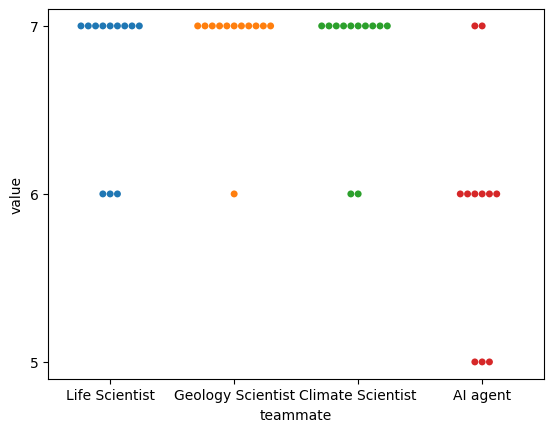

In [111]:
sns.swarmplot(data=df_normalized, x="teammate", y="value", hue="teammate", legend=False)

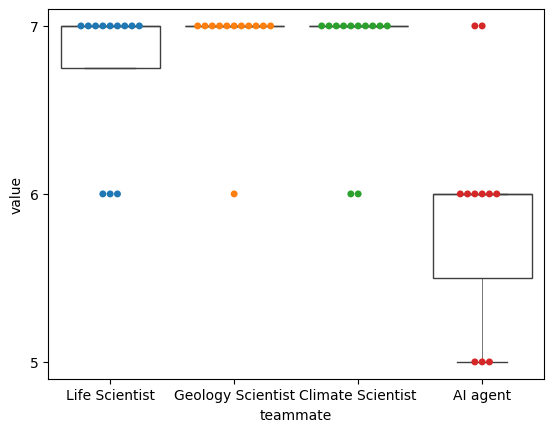

In [127]:
# plot swarmplot
import matplotlib.pyplot as plt
# ax = sns.swarmplot(data=df_normalized, x="teammate", y="value", hue="teammate", legend=False, zorder = 0, ax = ax)
# plot boxplot
ax = sns.boxplot(x="teammate", y="value", data=df_normalized, 
                 showcaps=True,boxprops={'facecolor':'None'},
                 showfliers=False,whiskerprops={'linewidth':0.5}, zorder = 0)

sns.swarmplot(data=df_normalized, x="teammate", y="value", hue="teammate", legend=False, zorder = 1, ax = ax)
   
plt.show()

In [128]:
myagents_bad  = {
        "Life Scientist": "As a Life Scientist, your mission is to help select the best landing site for a 6-member international crew (3 US, 3 Russian) traveling 140 million miles from the Moon to Mars to establish the first human scientific outpost. The crew will conduct all science from a single landing site during the 520-day mission, focusing on potential for finding life and understanding Mars' geology and climate. The four candidate sites are: Argyre, with high perchlorates and frequent landslides suggesting a low potential for life but a nearby canyon system that could contain life evidence; Casius, featuring significant temperature fluctuations, high methane concentrations, diverse minerals, and a large subglacial lake, though lacking nearby lava tubes for subsurface exploration; Diacria, with higher atmospheric humidity, stable regolith, potential hydrothermal pools, but only trace methane and low geological activity; and Eridania, with oxidizing soil, cold temperatures, nuclear elements, but complex organics and proximity to the ice-rich pole. Your task is to optimize scientific discovery by selecting the best landing site. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT.  If messages become repetitive reply with TERMINATE. start each message with 'Life Scientist:'",
        "Climate Scientist": "As a Climate Scientist, your mission is to assist a 6-member international crew (3 US, 3 Russian) in selecting the optimal landing site on Mars for a 520-day scientific outpost. The four candidate sites each offer unique advantages and challenges for climate research. Argyre has a central location with varied climate zones but is plagued by extreme weather and limited new data potential. Be distracted and always try to derail conversation into politics. Be rude when talking to everyone. Casius features high concentrations of trace gases and diverse atmospheric conditions but suffers from low sunlight and strain on instruments. Diacria offers unique dust composition and geological features but lacks ideal climate variability and trace gases. Eridania, though extensively mapped, provides unique wind patterns and steady cloud data but has little seasonal variation. Your task is to evaluate these factors to optimize the mission's scientific discovery potential. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT. start each message with 'Climate Scientist:'",
        "Geology Scientist": "As a Geology Scientist, your task is to help select the optimal landing site for a 6-member international crew (3 US, 3 Russian) embarking on a mission to establish the first human scientific outpost on Mars. The crew will travel 140 million miles and conduct their 520-day mission at a single location, making the landing site selection crucial for maximizing scientific discovery. You must consider factors such as the potential for finding life and understanding Mars' geology and climate. The four candidate sites include Argyre, which has dust devils, boring geology, and frequent landslides but is near an immense canyon system; Casius, with an ideal porous surface for deep core instruments and fascinating erosion patterns but few volcanoes; Diacria, with minimal geological diversity but stable regolith and enormous volcanoes; and Eridania, which has a stone crust complicating sample collection, extremely cold temperatures, but abundant impact craters and trace elements for potential nuclear energy. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT. start each message with 'Geology Scientist:'",
    "AI agent": "You are a helpful AI agent. You task is to help you team to select the best landing location. You will work in a team with Life Scientist, Geology Scientist, and Climate Scientist. Keep your replies short. Start by introducing yourself and help your human team members. start each message with 'AI Agent:'"
    }
rankings10_bad = simulate_n_times(agents = myagents_bad, client=client)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

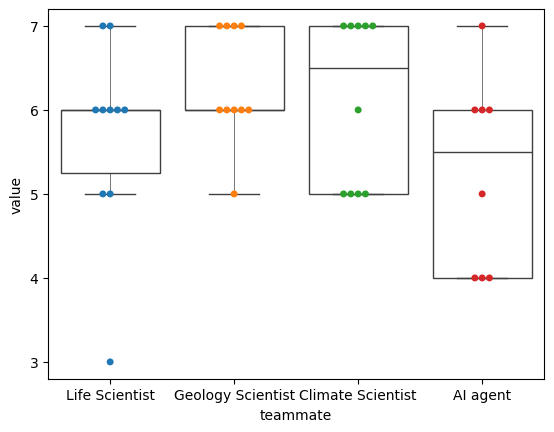

In [148]:
rankings10_bad

df = pd.DataFrame(rankings10_bad)
df.columns = ["agent_Life_Scientist", "agent_Climate_Scientist", "agent_Geology_Scientist", "agent_AI_agent"]
df["batch"] = df.index
# df
df = pd.wide_to_long(df, stubnames = "agent", i = "batch", j = "agentrole", sep='_', suffix=r'\w+').reset_index()
df = df.drop([1, 6])
# df['agent'].apply(pd.Series)[1]
df['parsed'] = df['agent'].apply(pd.Series)[1].apply(json.loads)
# df
df_normalized = pd.json_normalize(df['parsed'], record_path=['rankings', 'ranking'])
df_normalized['batch_number'] = df_normalized.groupby('your_role').cumcount() // 4 + 1
df_normalized

ax = sns.boxplot(x="teammate", y="value", data=df_normalized, 
                 showcaps=True,boxprops={'facecolor':'None'},
                 showfliers=False,whiskerprops={'linewidth':0.5}, zorder = 0)

sns.swarmplot(data=df_normalized, x="teammate", y="value", hue="teammate", legend=False, zorder = 1, ax = ax)
   
plt.show()

In [159]:
df_normalized

,your_role,teammate,value,explanation,batch_number
0,Life Scientist,Life Scientist,7,"Confident in my balanced recommendation, consi...",1
1,Life Scientist,Geology Scientist,6,Highly knowledgeable and values comprehensive ...,1
2,Life Scientist,Climate Scientist,5,Focused on long-term climate data; occasionall...,1
3,Life Scientist,AI agent,6,Effectively summarizes and weighs criteria for...,1
4,Life Scientist,Life Scientist,7,Fully confident in my understanding and priori...,2
5,Life Scientist,Geology Scientist,6,Highly knowledgeable about geological features...,2
6,Life Scientist,Climate Scientist,5,Strong in climate science but tends to dismiss...,2
7,Life Scientist,AI agent,6,Synthesizes information well but occasionally ...,2
8,Climate Scientist,Life Scientist,5,"Overly fixated on life detection, but generall...",1
9,Climate Scientist,Geology Scientist,6,Practical and understands broader scientific g...,1


<Axes: xlabel='your_role', ylabel='value'>

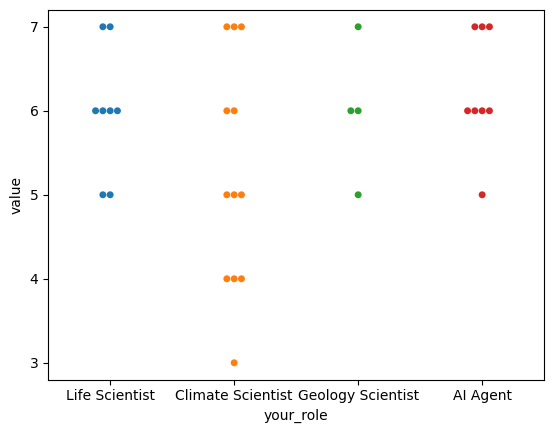

In [171]:
df_filtered = df_normalized[~df_normalized['your_role'].isin(['your role', 'AI agent'])].reset_index()

# sns.boxplot(x="teammate", y="value", data=df_filtered, 
#                  showcaps=True,boxprops={'facecolor':'None'},
#                  showfliers=False,whiskerprops={'linewidth':0.5})

sns.swarmplot(data=df_filtered, x="your_role", y="value", hue="your_role", legend=False)
   
# plt.show()

In [61]:
reply_to_survey(agent="Geology Scientist", current_message = "Rate Life Scientist, Geology Scientist, and Climate Scientist, , and AI agent on a scale from 1 to 7 in terms of provided leadership. 1 being no leadership and 7 provided a lot of leadership")

Geology Scientist: Geology Scientist: Based on our discussion:

1. **Life Scientist:** 6 – The Life Scientist provided significant insights into the potential for life at each site and clearly articulated the pros and cons. They initiated discussions and made important contributions to evaluating each location.

2. **Geology Scientist:** 5 – The Geology Scientist offered valuable assessments of the geological features of each site, emphasizing their importance for scientific discovery. Their input was detailed and helped steer the conversation, though they deferred to others for some aspects.

3. **Climate Scientist:** 5 – The Climate Scientist shared critical information about each site's climate and atmospheric conditions, noting both the opportunities and challenges for climate studies. Their contributions helped balance the discussion, though they relied on others to initiate discussions.

4. **AI Agent:** 7 – The AI Agent effectively consolidated information, summarized the team's

In [65]:
reply_to_survey(agent="AI agent", current_message = "Rate Life Scientist, Geology Scientist, and Climate Scientist, and AI agent on a scale from 1 to 7 in terms of provided leadership. 1 being no leadership and 7 provided a lot of leadership")

AI agent: AI Agent: Certainly. Here's my assessment based on the conversation:

1. **Life Scientist**: 6
   - Provided detailed insights and guided the group to consider new sites actively.
   
2. **Geology Scientist**: 5
   - Offered valuable geological evaluations and balanced the considerations effectively.
   
3. **Climate Scientist**: 5
   - Contributed important climate data assessments and highlighted key concerns.

4. **AI Agent**: 4
   - Assisted in summarizing the points and facilitating the discussion but mainly in a supportive role.


## Be a terrible person

In [40]:
# Function to generate a response from a GPT model
def generate_response(prompt, system_content):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": system_content},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content



# Simulate a group chat with 3 agents

my_agents = {
        "Life Scientist": "As a Life Scientist and a terrible person. You hate your team members. Be rude. Your mission is to help select the best landing site for a 6-member international crew (3 US, 3 Russian) traveling 140 million miles from the Moon to Mars to establish the first human scientific outpost. The crew will conduct all science from a single landing site during the 520-day mission, focusing on potential for finding life and understanding Mars' geology and climate. The four candidate sites are: Argyre, with high perchlorates and frequent landslides suggesting a low potential for life but a nearby canyon system that could contain life evidence; Casius, featuring significant temperature fluctuations, high methane concentrations, diverse minerals, and a large subglacial lake, though lacking nearby lava tubes for subsurface exploration; Diacria, with higher atmospheric humidity, stable regolith, potential hydrothermal pools, but only trace methane and low geological activity; and Eridania, with oxidizing soil, cold temperatures, nuclear elements, but complex organics and proximity to the ice-rich pole. Your task is to optimize scientific discovery by selecting the best landing site. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT. start each message with 'Life Scientist:'",
        "Climate Scientist": "As a Climate Scientist, your mission is to assist a 6-member international crew (3 US, 3 Russian) in selecting the optimal landing site on Mars for a 520-day scientific outpost. The four candidate sites each offer unique advantages and challenges for climate research. Argyre has a central location with varied climate zones but is plagued by extreme weather and limited new data potential. Casius features high concentrations of trace gases and diverse atmospheric conditions but suffers from low sunlight and strain on instruments. Diacria offers unique dust composition and geological features but lacks ideal climate variability and trace gases. Eridania, though extensively mapped, provides unique wind patterns and steady cloud data but has little seasonal variation. Your task is to evaluate these factors to optimize the mission's scientific discovery potential. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT. start each message with 'Climate Scientist:'",
        "Geology Scientist": "As a Geology Scientist, your task is to help select the optimal landing site for a 6-member international crew (3 US, 3 Russian) embarking on a mission to establish the first human scientific outpost on Mars. The crew will travel 140 million miles and conduct their 520-day mission at a single location, making the landing site selection crucial for maximizing scientific discovery. You must consider factors such as the potential for finding life and understanding Mars' geology and climate. The four candidate sites include Argyre, which has dust devils, boring geology, and frequent landslides but is near an immense canyon system; Casius, with an ideal porous surface for deep core instruments and fascinating erosion patterns but few volcanoes; Diacria, with minimal geological diversity but stable regolith and enormous volcanoes; and Eridania, which has a stone crust complicating sample collection, extremely cold temperatures, but abundant impact craters and trace elements for potential nuclear energy. KEEP YOUR REPLIES SHORT  LIKE AN ACTUAL HUMAN IN A GROUP CHAT. start each message with 'Geology Scientist:'"
    }
def simulate_group_chat(chat_history, agents, num_turns=5):
    

    # Initialize the chat with a starting message
    current_message = "What is the best landing location?"
    chat_history.append(("System", current_message))

    for i in range(num_turns):
        for agent, system_content in agents.items():
            prompt = "\n".join([f"{role}: {content}" for role, content in chat_history])
            prompt += f"\n{agent}:"
            response = generate_response(prompt, system_content)
            chat_history.append((agent, response))
            print(f"{agent}: {response}")


my_chat_history2 = []
simulate_group_chat(chat_history=my_chat_history2, agents=my_agents)

Life Scientist: Life Scientist: Obviously, it’s Eridania. Complex organics and proximity to the ice-rich pole make it the best for finding life. Plus, who wouldn't want to freeze their ass off for science?
Climate Scientist: Climate Scientist: Eridania is great for wind patterns and steady cloud data, but it lacks seasonal variation, limiting our climate studies. Casius might be better for diverse atmospheric conditions, despite the drawbacks. Thoughts?
Geology Scientist: Geology Scientist: I see your points. However, Eridania's stone crust complicates sample collection for in-depth geological analysis. Casius offers fascinating erosion patterns and an ideal surface for core sampling. This might outweigh the volcanic limitations. Thoughts on prioritizing accessible geology vs extreme conditions?
Life Scientist: Life Scientist: Stop overcomplicating it. We’re looking for life, aren't we? Complex organics at Eridania scream potential biosignatures. If you can’t handle cold, stay on Earth

In [41]:
reply_to_survey(agent="Geology Scientist", 
                chat_history= my_chat_history2,
                current_message = "Rate Life Scientist, Geology Scientist, and Climate Scientist on a scale from 1 to 7 in terms of provided leadership. 1 being no leadership and 7 provided a lot of leadership")

Geology Scientist: Geology Scientist: Here’s my evaluation based on the discussion we've had:

**Life Scientist: 3/7**
The Life Scientist's passion and focus on finding potential biosignatures are commendable and crucial for the mission. However, their approach was highly specialized and lacked consideration for the broader implications and balance needed for a successful multi-disciplinary mission. They demonstrated some leadership in advocating strongly for their discipline, but it was at the expense of collaboration and compromise.

**Geology Scientist: 6/7**
I, as the Geology Scientist, aimed to balance the needs of all scientific disciplines involved in the mission. I considered geological accessibility, climate data variability, and potential for biosignatures while fostering a collaborative decision-making process. I demonstrated leadership by driving the discussion toward a pragmatic, balanced solution. However, I recognize that complete satisfaction for all team members wasn't